# Chapter 1 - Data Sourcing

<div>
<img src="../imgs/product-proliferation.png" width="750"/>
<figcaption><em>The modern data landscape has so much data...no, really—SO much data. Which data should you use?</em></figcaption>
<div>

#### ***Chapter Imports***

Before running any code blocks in the following chapter, please ensure you have the necessary Python packages installed via the following code block:

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


## 1.0. Preface: why source good data? 

* Analysis for any research project begins with data sourcing; without any data, there's no tests to run, no trends to identify, no hypotheses to validate, etc. 

* But, the modern data landscape is vast and can be overwhelming—look up "X + dataset" for almost topic, and you'll likely find a multitude of resources published by private organizations, government agencies, licensed data vendors, open-source groups, etc. Does it matter whose data you go with? 

* **Absolutely** — identifying and sourcing quality data is essential to the research process. If conducting analyses is like cooking, sourcing data is like acquiring ingredients—whether you're following a recipe or not, things will likely not turn out well if the base inputs are of poor quality. 


## 1.1. Defining "data sourcing"

Data sourcing is the process of: 

* **finding**; 
  
* **assessing**; and,
  
* **selecting**

a data resource to work with. Even for the same statistic, data resources can differ by basic attributes like values, author, purpose and more meta factors like availability, structure, representativeness, etc. 

Purposeful data sourcing is often overlooked in favor of convenience (i.e., using the first available and/or most popular dataset), but as we'll see, data sourcing decisions determine data attributes—which can ultimately impact downstream analysis. 

## 1.2. Issues in data sourcing

Many issues can arise when attempting to source quality data, but in this chapter, we're going to explore this topic in the context of three practices:

1. **Deciding between multiple data authors;**

2. **Understanding author incentives and purpose;** and 

3. **Validating data and data generation approaches.**

For this and future chapters, chapter sub-topics will include numbered discussion sections and accompanying coding exercises or visualizations. It's suggested that you work through them in order, but doing so is not strictly necessary. 

Scroll down to get started! 

## 1.3. Deciding between multiple data authors

Look up "US GDP data" in your web browser of choice. 

<div>
<img src="../imgs/gdp_webquery.png" width="500"/>
<div> 
<br>

How many potential data sources can you find in just a minute? 10? 20? 100? Is one clearly better than the others? Despite looking up 'US GDP data,' are all sources providing you with the same values in their data stores? Which one would you use in what circumstances?

In a way, all data sourcing practices are trying to solve this exact problem: reasonably decide between multiple data authors. The issues we'll talk about later in this chapter and others are all, in some way, shape, or form, determined by who the data author is (even if it's yourself) and what decisions they chose to make when collecting and crafting the dataset. 

For now, let's explore a few different GDP datasets and consider which one we might choose and why:

#### ***CODING EXERCISE: SOURCING GDP DATA***

In [2]:
# importing some libraries: 
import os                           # use: file management and access 
import pandas as pd                 # use: data intake and manipulation 

In [3]:
""" DATA SOURCING: DIFFERENT DATA AUTHORS """
# when I look up 'US GDP data', the first result is from the Bureau of Economic Advisors (BEA): 
datasets_dir = os.path.dirname(os.getcwd()) + os.sep + 'sample_datasets' + os.sep 
bea_data = pd.read_csv(datasets_dir + 'gdp_bea_q2_2022_adv.csv' , encoding='utf-8')

# how's it structured? is it usable?
print(bea_data.head(10))

  Table 2. Contributions to Percent Change in Real Gross Domestic Product  \
0                                               Line                        
1                                               Line                        
2                                               Line                        
3                                                NaN                        
4                                                  1                        
5                                                NaN                        
6                                                  2                        
7                                                  3                        
8                                                  4                        
9                                                  5                        

                           Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0                                 NaN     2019.00     2020.00     2021.00  

In [4]:
# I can also find more GDP data through other official-sounding organizations: 
# e.g., GDP data from the St. Louis Federal Reserve (FRED): 
fred_data = pd.read_csv(datasets_dir + 'gdp_fred.csv' , encoding='utf-8')
print(fred_data.head(10))

        DATE      GDP
0   1/1/1947  243.164
1   4/1/1947  245.968
2   7/1/1947  249.585
3  10/1/1947  259.745
4   1/1/1948  265.742
5   4/1/1948  272.567
6   7/1/1948  279.196
7  10/1/1948  280.366
8   1/1/1949  275.034
9   4/1/1949  271.351


In [5]:
# how about GDP data from a random website? here's some from macrotrends.net:
macrotrends_data  = pd.read_csv(datasets_dir + 'gdp_macrotrends.csv', encoding='utf-8')
print(macrotrends_data.head(10))

                           Macrotrends Data Download Unnamed: 1 Unnamed: 2  \
0                                                NaN        NaN        NaN   
1                                 U.S. GDP 1960-2022        NaN        NaN   
2                                                NaN        NaN        NaN   
3                                                NaN        NaN        NaN   
4  DISCLAIMER AND TERMS OF USE: HISTORICAL DATA I...        NaN        NaN   
5  FOR INFORMATIONAL PURPOSES - NOT FOR TRADING P...        NaN        NaN   
6  NEITHER MACROTRENDS LLC NOR ANY OF OUR INFORMA...        NaN        NaN   
7  FOR ANY DAMAGES RELATING TO YOUR USE OF THE DA...        NaN        NaN   
8                                                NaN        NaN        NaN   
9                                                NaN        NaN        NaN   

  Unnamed: 3  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
5        NaN  
6        NaN  
7        NaN  
8     

Do these different data sources look even remotely similar? Despite all being search results for 'US GDP data,' what are some ways that these data sources are different? 

[comment]: <> (Go into Excel csv's. Have discussion - notable differences: structure, units frequency/time scale, commerical/gov't sourcing, advance/second/third/latest estimate)

Among others, a key difference in these data resources is ***usability***. As provided, we can visualize and manipulate the FRED data most easily using code:

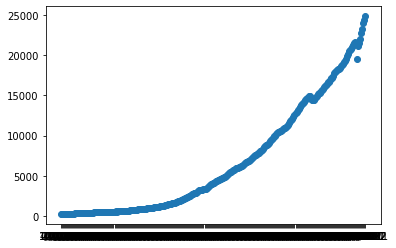

In [6]:
import matplotlib.pyplot as plt     # use: custom data visualization 

# generate a simple scatter plot of the GDP by date: 
plt.scatter(fred_data['DATE'], fred_data['GDP'])

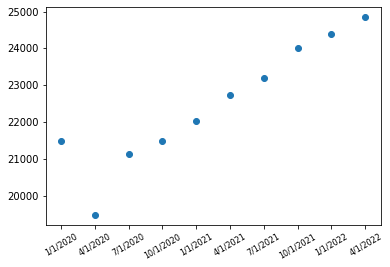

In [7]:
# that's a lot of data - how about just the most recent observations? 
fred_data_subset = fred_data.tail(10)

# let's make sure things are a litte more read-able on the x-axis:
plt.xticks(rotation = 30, fontsize = 8)
plt.scatter(fred_data_subset['DATE'], fred_data_subset['GDP'])

#### ***DISCUSSION 1:***

From this quick exploration and visualization exercise, we can see that the FRED data is a timeseries dataset which appears relatively clean and ready for analysis - it contains only two columns: ```DATE``` and ```GDP```. You might be tempted to just go ahead and run with it. But, for official and/or frequently-used statistics in particular, it's worth taking a step back from usability during the data sourcing process. Why? 

1. Individuals and groups may publish their own versions of statistics which are usable, but perhaps not official. Using the official source can establish credibility for your research. 

2. Or, maybe these off-shoot datasets are based on the official version, but have been processed in a meaningful way. 

    * e.g., the FRED data (found [here](https://fred.stlouisfed.org/series/GDP)) is notated as 'GDP, Billions of Dollars, Seasonally Adjusted Annual Rate'. Maybe this adjustment isn't desirable for your research. <br></br>
  
3. Particular fields or subjects may have reputable and established datasets that not only can make your research more credible but also easier through the use of existing analytic tools and techniques others have developed for similar research! 

Point 1 (i.e., using official/licensed data authors for choice statistics) is especially key for social science research (where less direct experimentation and independent data collection may be performed). For US GDP data, a quick web query of *"Who measures US GDP?"* informs us that the Bureau of Economic Analysis (BEA) is responsible for its publication while the Bureau of Labor Statistics collects the raw data used for GDP calculation ([source 1](https://www.investopedia.com/ask/answers/031715/how-does-united-states-government-measure-economic-growth.asp#:~:text=The%20U.S.%20government%20collects%20and,GDP%20and%20the%20national%20income.), [source 2](https://www.commerce.gov/data-and-reports/economic-indicators)). 

#### ***DISCUSSION 2:***

One of our datasources was the BEA, but it's still a good idea to perform a trace and identify the most base-level resource used to generate each of our potential datasets. After all, multiple or all of them could be re-releases of BEA data, making them equally reputable! For our remaining datasets: 

* FRED GDP data is co-opted from the [BEA](https://fred.stlouisfed.org/series/GDP#:~:text=NOTES-,Source%3A%20U.S.%20Bureau%20of%20Economic%20Analysis,-Release%3A%20Gross)'s release; and

* The GDP data from macrotrends.net is sourced from the [World Bank](https://www.macrotrends.net/countries/USA/united-states/gdp-gross-domestic-product#:~:text=Data%20Source%3A%20World%20Bank), which in turns computes their GDP measures from World Bank and OECD (Organisation for Economic Co-operation and Development) [national accounts data](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2019&locations=US&start=1990#:~:text=Also%20Show,Details).

If you're okay with it, go ahead and trust me that the BEA and World Bank are fairly reputable sources. Now that we've done some initial data exploration and sourcing inspections, let's summarize what we know and return to the original question underlying all data sourcing practices: *which dataset do we choose, and why?* 

<center>
                                                   <strong>Table 1. GDP dataset characteristics</strong>
<br><br>

| Listed source | Base source     | Collecting organization | Data type       | Timeframe              | Notable features         |
|---------------|-----------------|-------------------------|-----------------|------------------------|--------------------------|
| BEA           | BEA             | Government              | Cross-sectional | Point-in-time, 2022 Q2 | GDP by sector            |
| FRED          | BEA             | Government              | Timeseries      | Annual, 1947-2022      | Seasonally adjusted      | 
| MacroTrends   | Worldbank, OECD | International Body      | Timeseries      | Annual, 1960-2022      | Add. calcs like % change | 

</center>

#### ***DISCUSSION 3:***

Considering that all of potential data sources come from similarly reputable authors, which one should we use? And by now, you may have noticed that I've been purposely vague as to what this data will be used for - intentionally, I promise! And that's because, if author credibility is established, which dataset you choose to use *ultimately depends on your specific application.* 

Perhaps you require a by-sector breakdown of GDP, and would like to opt for the BEA data (which can be transformed into cross-sectional timeseries data, aka panel data, by merging with other datasets). Or, if you just need some numbers to run a quick analysis for your own use, FRED data could be the best. And if you need slightly richer timeseries data, MacroTrends could be the ideal source. 

Other than original author credibility, here are some other metrics you may consider using when sourcing data: 

<br>
<center>
<strong>Figure 1. Data sourcing criteria</strong>
<br><br>
<img src="../imgs/datasource_criteria.svg" width="700"/>
</center> 

#### ***1.3. - CONCLUSION:***


Now you might be asking yourself, source tracebacks and verfication are well and good, but rather time-consuming. If you need to decide between only 3-10 datasets, this case-by-case assessment is feasible, but what if you're starting a project from the ground up? There could be hundreds if not thousands of datasets you need to evaluate. Surely there's a quicker way to do some sort of preliminary filtering of source viability...

## 1.4. Understanding author incentives and purpose

...and wouldn't you believe it, there is! We can consider the research *intended purpose and incentives* of "generic research entity types."

#### ***PREFACE:***

Two quick notes before we get started: 

1\. What is a "generic research entity type?" Well, it's a (bit of an awkward) name for a type of individual/group that would conduct research and publish data. A non-exhaustive list includes:  
  
  - **Academic** - students, professors, research aides, organized labs and groups, reserach institutes, etc. 

  - **Governmental** - state and local governments, individual bureaucrats, federal departments and associations (e.g., Dept. of Defense, NASA), international bodies like the U.N.

  - **Commerical** - companies and corporations (espeically advisory companies - e.g.,  management consulting firms)

Going forward, I'll refer to these generics as "reseacher types" with the caveat that we aren't necessarily referring to individual researchers. Name suggestions for this concept are welcome! 

2\. Also, we can certainly do the forthcoming data sourcing practice on a dataset-by-dataset level (and I would encourage you to do so)! 

  * But, applying this practice in the context of research entity-types rather than specific entities can be a useful way to expedite the data sourcing process, as different entities belonging to the same researcher type can have similar/shared purposes and incentives. 

Now we're ready to dive in! 

<div>
<img src="../imgs/incentives.png" width="500"/>
<figcaption><em> When you're a [research entity], everything looks like a [carrot], or something like that... </em></figcaption>
<div> 
<br>

#### ***DISCUSSION 4:***

What does it mean to consider the intended purpose and incentives of a generic entity? For me, it's all about answering two key questions: 

* To identify an **intended purpose,** I ask myself: *"How did the person/group/researcher type who published this data want it to be used?"*

* To identify **incentives,** I ask myself: *"Why did this person/group/researcher type conduct the research that gave rise to this data resource in the first place?*

Take a few minutes to brainstorm some potential answers to these questions in the context of researcher types, and then take a look at the following table! 

<center>
                                                   <strong>Table 2. Research type incentives</strong> 
<br><br>

| **Researcher type** | **Researcher sub-type**    | **Potential incentives**                                                  | **Potential intended purposes**                                |
|---------------------|----------------------------|---------------------------------------------------------------------------|----------------------------------------------------------------|
| Academic            | Professor                  | Boosting reputation, securing tenure, "scooping" competitors              | To suggest a causal relationship between ___ and ___           |
| Academic            | Student                    | Jockeying for authorship position, ensuring lab employment                | (Commonly aligned with a supervising faculty/lab)              |
| Governmental        | Department of Defense      | Lobbying for funding, influencing other dept.'s spending & efforts        | To demonstrate a security vulnerability to ___ from ___        |
| Governmental        | U.N.                       | Motivating international sanctions, initiatives, coalition-building, etc. | To coordinate the policies of ___ and ___                      |
| Commercial          | Financial Analyst          | Identifying investment opportunities, improving perceived performance     | To encourage/expedite internal or external financial decisions |
| Commercial          | Management Consulting Firm | Generating & securing additional clientele through discovered needs       | To be read and create demand for their services                |
</center>

This is in no way a complete list (where would you make changes? additions? deletions?) - but hopefully it can help you see that researchers may be operating with conscious/unconscious biases when collecting the data that ultimately underpins their research. Then, how should this knowledge impact your data sourcing process? 

* Always keep in mind that most research (and supporting data) suffers from *publication bias,* or the failure to publish the results of a study on the basis of the direction and/or strength of the study findings. 

* Relatedly, studies can suffer from a *"newsworthy bias,"* where individuals only publish research and accompanying data which demonstrates an interesting or notable result, which can already suggest anomalies in the collected data. 

* Opting for alternate researcher types when there are egregious conflicts on interest (e.g., climate studies data collected by petroleum companies) is a logical first step. Most of the time, maintaining a weak preference for academic & governmental sources is recommended.

* More generally, you can select data sources such that the original dataset's intended purpose and related incentives are orthogonal to your current study's purpose; i.e., if you wanted to collect data on non-exercise cancer risk factors, you could think about using the covariates data from another study that proposes a link between cancer risk and being sedentary. 

#### ***DISCUSSION 5:***

Of special note is the fact that for both researcher types and specific researchers within a type, incentives and intended purpose of analogous studies (and their related data) *can change over time* - this is especially important to consider in the context of timeseries analysis. To understand how changing incentives and intended purpose can impact collected data, let's see an example: 

<div>
<img src="../imgs/small_business.png" width="500"/>
<div><br>

We're going to zoom in on the contribution of portion of national GDP generated by small businesses. Essentially all of the recent studies and available data on small business GDP (SGDP) is spearheaded by one author within one organization, the federal government's Small Business Administration. Here's some info about two reports released by this same author: 

* [Report 1](http://www.richschwinn.com/index/sgdp_v1.8_SBA.pdf): 

  * Published: April 2007 
  
  * Data timeframe: 1998-2004

* [Report 2](https://permanent.fdlp.gov/websites/www.sba.gov/advo/research/rs299.pdf): 

  * Published: December 2017

  * Data timeframe: 1998-2014 

*(Note: All data used in the following dicussion were sourced from these reports.)*

As part of both reports, SGDP as a percentage of GDP (both nominal figures) is calculated. In the overlapping timeframes of the two reports (i.e., 1998-2004), would we expect there to be dramatic differences in the SGDP as a percentage of GDP data? Why? Could incentives and intended purpose changed - how so? 

Let's take a look with some code: 

#### ***CODING EXERCISE: AUTHOR INCENTIVES & SGDP***

In [8]:
# required imports: 
import os                           # use: file management and access 
import numpy as np                  # use: some calculations
import pandas as pd                 # use: data intake and manipulation 
import matplotlib.pyplot as plt     # use: data viz. 

In [9]:
""" DATA SOURCING: CHANGING INCENTIVES AND INTENDED PURPOSE """
# importing the data (index column has year values): 
datasets_dir = os.path.dirname(os.getcwd()) + os.sep + 'sample_datasets' + os.sep 
sgdp_data = pd.read_csv(datasets_dir + 'sgdp_sba.csv' , encoding='utf-8', header=0, index_col=0)

# 2017 subset of data: 
print(sgdp_data['2017_report_sgdp_share'])

year
1998    49.2
1999    49.1
2000    48.5
2001    48.8
2002    47.1
2003    47.0
2004    46.5
2005    45.5
2006    45.4
2007    45.4
2008    45.0
2009    44.7
2010    44.4
2011    44.3
2012    44.2
2013    43.6
2014    43.5
Name: 2017_report_sgdp_share, dtype: float64


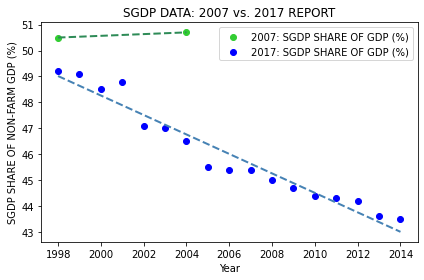

In [10]:
# some scatter plots of the data: 
plt.scatter(sgdp_data.index, sgdp_data['2007_report_sgdp_share'], label='2007: SGDP SHARE OF GDP (%)', color='limegreen')
plt.scatter(sgdp_data.index, sgdp_data['2017_report_sgdp_share'], label='2017: SGDP SHARE OF GDP (%)', color='blue')

# 2007 best fit line: 
xvals = [1998, 2004]
yvals = [sgdp_data.loc[[1998]]['2007_report_sgdp_share'].values[0], sgdp_data.loc[[2004]]['2007_report_sgdp_share'].values[0]]
plt.plot(xvals, yvals, linewidth=2, linestyle='--', color='seagreen')

# 2017 best fit line: 
a, b = np.polyfit(sgdp_data.index, sgdp_data['2017_report_sgdp_share'], 1)
plt.plot(sgdp_data.index, a*sgdp_data.index + b, linewidth=2, linestyle='--', color='steelblue')

# formatting options: 
plt.title("SGDP DATA: 2007 vs. 2017 REPORT")
plt.xlabel("Year"), plt.ylabel("SGDP SHARE OF NON-FARM GDP (%)")
plt.legend(loc='upper right')
plt.tight_layout()

#### ***DISCUSSION 6:***

Even from this quick visualization, major discrepancies are apparent: 

* The 2007 report contained only initial and ending figures for SGDP share as a % of GDP, while the 2017 report offered data points for all years reviewed in the report. 

* The trend in SGDP share is directionally opposite for the two reports. 

* The two reports aim to measure the same metric, but have differing figures for their shared years of measurement (1998, 2004). 

What might be the cause of the lack of granular data in the 2007 report? How about the apparent switch in the trend of SGDP share? Is there reason to suspect a shift in intended purpose and incentives (recall that both reports were sanctioned by the Small Business Administration, and their respective years of publication)?

#### ***1.4. - CONCLUSION:***

Ultimately, while we aren't here to play whistleblower, in this case and almost all others, it's worth noting that which dataset you elect to use may have great impact on your research results - especially when it comes to multiple data resources claiming to measure the same metric; i.e., suppose you wanted to investigate small business health in the decade before and after the Great Recession. How would which dataset you use impact your results? How so? 

In short, incentives & intended purposes of research can change across researcher types, for the same researcher type, and even for the same researcher. These changes may not give rise to drastically misreported or conflicting data - but in research, the details matter. So, it's always worth thinking about what incentives and intended purpose can imply for data resources, and your research. 

## 1.5. Validating data and data generation approaches

The final issue in data sourcing we'll be discussing is the validation of data and its associated dataset generation approach: 

#### ***DISCUSSION 7:***

* A data generation approach is simply the methodology used to collect and compute a given data resource. In a way, this topic is best described as a data sourcing meta-issue since: 

  * Validating either data itself and/or its generation approach can lend additional credence to a data source (helping you to decide between multiple data authors); and 

  * Understanding which data generation approach was used and why can be informative as to research incentives and intended purpose. 

* And just like understanding data author incentives and intended purpose, grappling with this issue can be thought of answering two questions: 

  * Does the approach this researcher, agency, etc. uses to compute this metric or dataset commonly accepted and reasonable? 

  * If it is, does this data author provide the necessary data resources and instructions for you to re-generate the associated dataset? (If you do, does your dataset match theirs?) 

To better understand this topic, let's explore it in the context of GDP data! 

#### ***DISCUSSION 8:***

GDP can be measured in [three different ways](https://www.imf.org/external/pubs/ft/fandd/basics/gdp.htm#:~:text=Theoretically%2C%20GDP%20can%20be%20viewed%20in%20three%20different%20ways%3A): 

* The *production approach* sums the value-added at each stage of production for all goods and services (where value-added is defined as the sales value minus the value of intermediate inputs);

* The *expenditure approach* sums the value of all purchases made by final users (i.e., the consumption of households, the investment of companies, and the purchases of goods and services by goverment entities and foreign consumers).

* The *income approach* sums all of the incomes generated by production (including but not limited to the compensation employees receive and the operating surplus of companies).

In *theory*, each of these approaches should generate the same GDP figures/data: 

* Consider the expenditure and income approaches - in a simplified economy with  consumers and businesses, every dollar a consumer receives as income (income approach) will be accounted for as a dollar spent on a good or service from some business (expenditure approach). 
  
* This relationship is neatly captured in a diagram shown in introductory economics classes across the world, the circular flow diagram: 

    <div>
    <img src="../imgs/circularflow.png" width="400"/>
    <figcaption><em>Is it really this simple? We shall see...</em></caption>
    <div> 

The BEA publishes official GDP data using the [expenditure approach](https://www.bea.gov/resources/methodologies/measuring-the-economy) (see Page 4, Section "Income"), but also measures and releases GDP figures generated using the income approach as GDI (**G**ross **D**omestic **I**ncome) data. Let's see how the theoretical 1:1 relationship holds up in practice (data from [FRED](https://fred.stlouisfed.org/series/GDI)):

#### ***CODING EXERCISE: DATA GENERATION & GDP COMPUTATION APPROACHES***

In [11]:
# required imports: 
import os                           # use: file management and access 
import numpy as np                  # use: some calculations
import pandas as pd                 # use: data intake and manipulation 
import matplotlib.pyplot as plt     # use: data viz. 

In [12]:
""" DATA SOURCING: DATA GENERATION APPROACHES """
# importing the data (index column has year values): 
datasets_dir = os.path.dirname(os.getcwd()) + os.sep + 'sample_datasets' + os.sep 
gdp_approaches_data = pd.read_csv(datasets_dir + 'gdp_diff_approaches.csv' , encoding='utf-8')

# let's take a subset of the data:
gdp_approaches_data = gdp_approaches_data.tail(15)

# data structure: index, date, gdp, gdi (billions of nominal dollars)
print(gdp_approaches_data.tail(10))

          date        gdp        gdi
292   1/1/2020  21481.367  21755.875
293   4/1/2020  19477.444  19620.204
294   7/1/2020  21138.574  20908.535
295  10/1/2020  21477.597  21972.571
296   1/1/2021  22038.226  22547.899
297   4/1/2021  22740.959  23132.650
298   7/1/2021  23202.344  23833.203
299  10/1/2021  24002.815  24619.857
300   1/1/2022  24386.734  25223.141
301   4/1/2022  24882.878  25860.059


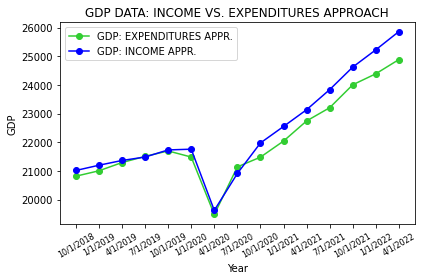

In [13]:
# scatter plots of the data: 
plt.plot(gdp_approaches_data['date'], gdp_approaches_data['gdp'], linestyle='-', marker='o', label='GDP: EXPENDITURES APPR.', color='limegreen')
plt.plot(gdp_approaches_data['date'], gdp_approaches_data['gdi'], linestyle='-', marker='o', label='GDP: INCOME APPR.', color='blue')

# formatting options: 
plt.title("GDP DATA: INCOME VS. EXPENDITURES APPROACH")
plt.xlabel("Year"), plt.ylabel("GDP")
plt.xticks(rotation = 30, fontsize = 8)
plt.legend(loc='upper left')
plt.tight_layout()

The two approaches seem to generate reasonably similar figures, but let's get a better picture of just the differences in measurements over time: 

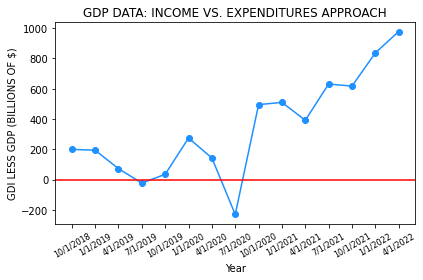

In [14]:
# compute the diff: 
gdp_approaches_data['gdp_diff'] = gdp_approaches_data['gdi'] - gdp_approaches_data['gdp']

# plot the diff: 
plt.plot(gdp_approaches_data['date'], gdp_approaches_data['gdp_diff'], linestyle='-', marker='o', color='dodgerblue')

# formatting options: 
plt.title("GDP DATA: INCOME VS. EXPENDITURES APPROACH")
plt.xlabel("Year"), plt.ylabel("GDI LESS GDP (BILLIONS OF $)")
plt.xticks(rotation = 30, fontsize = 8)
plt.axhline(y=0, color='red', linestyle='-')
plt.tight_layout()

As we can see, for the past 7 fiscal quarters, GDI has consisently been measured as ~500+ billion dollars *greater* than GDP. Why is this? In the case of GDP, the disparity between the measurements resulting from different approaches is generally the product of multiple factors: 

* Meta-issues like differences in the accuracy and timeliness of contributing data resources can give rise to meaningful differences.  

* Structural differences in how the approaches operate can also contribute to the divergence: 
  
  * For instance, if an individual saves a portion of their income in cash, the value of these savings are reflected in the income approach data but not the expenditure approach data for the same year.

  * Individuals might save their income as inflation appears to be rising (as an inflationary hedge) and/or as economic conditions appear to worsen - [does this sound familiar](https://fortune.com/2021/12/03/inflation-no-longer-transitory-higher-prices-fed-chair-powell-treasury-yellen/)? 

#### ***DISCUSSION 9:***

Thus, in *practice*, GDP measurements (and data more generally) generated through different approaches can differ substantially. 

* And, while a real-life example is not readily available, one could imagine how selectively using GDP data generated by different approaches could be a means to exaggerate an economic conclusion: 

  * For example, a researcher could use expenditure-approach GDP data during a period of economic recession (where there is typically deflated consumer expenditure and increased savings) and then use income-approach GDP data during the post-recession years (where there is typically an influx of expenditures purchased using saved cash) to depict stronger-than-actual economic recovery. <br></br>
  
* Still, it's important to note that, while GDP as measured by the expenditure approach is more commonly used, both GDP and GDI are well-established measures. In any research scenario where multiple approaches to data generation or collection exist, if the sources are similarly reputable, you should seek appropriate justification for the approach(es) used.

#### ***1.5. - CONCLUSION:***

As a final note, when a data generation approach is offered, you can also attempt to generate a data resource yourself: 

* While this practice is likely one of the strongest forms of data validation possible, it also is limited by varying degrees of applicablity; your ability to do so is contingent on the availability of the supporting/underlying datasets - e.g., you likely wouldn't be able to attempt this practice for a behavioral experiment, a mass measurement project like GDP, etc. 

* Also, this practice is not at all necessary to conduct good, grounded research. It can be particularly valuable when you wish to co-opt a methodology or dataset that is relatively new in a field, but even then is not a requisite depending on the rigorousness of the original datasource. 

Ultimately, data and data generation approach validation are like the dessert of the data sourcing meal - not essential, but it certainly helps round things out!

## 1.6. *Chapter Takeaways*

1. When identifying a dataset to work with, remember that usability is not the only criterion of interest — always traceback each resource's original author and verify that author's credibility. 

2. Always consider the incentives and intended purpose of the work through which data is acquired; doing so can help you identify a reliable data resource more quickly, while also foreshadowing implications for the data itself (and your research should you use it).

3. Be sure to identify and evaluate the data generation approach used to create an external data resource — especially for figures/metrics where multiple data resources are available. When possible and valuable, consider replicating the data generation process to fortify your usage of the data resource. 